In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('wine_data.csv', header = None, usecols=[0,1,2])
df.columns = ['Class_label', 'Alcohol', 'Malic_acid']
df.head()

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [6]:
df.shape

(178, 3)

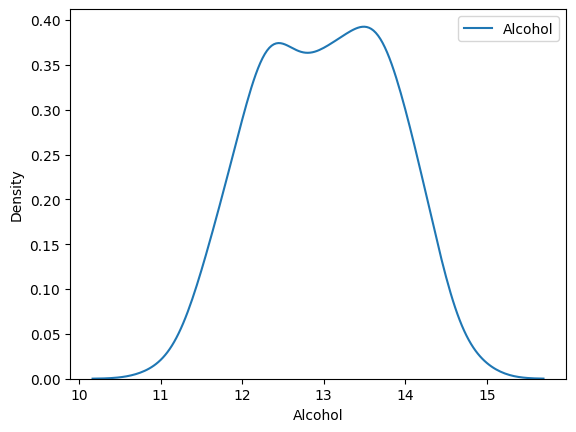

In [9]:
sns.kdeplot(df['Alcohol'], label ='Alcohol')
plt.legend()

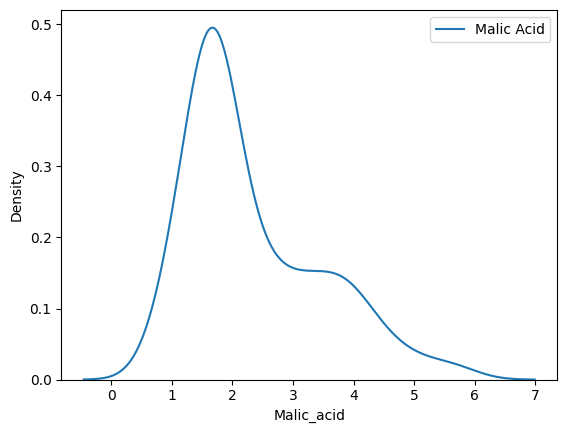

In [10]:
sns.kdeplot(df['Malic_acid'], label = 'Malic Acid')
plt.legend()

<Axes: xlabel='Alcohol', ylabel='Malic_acid'>

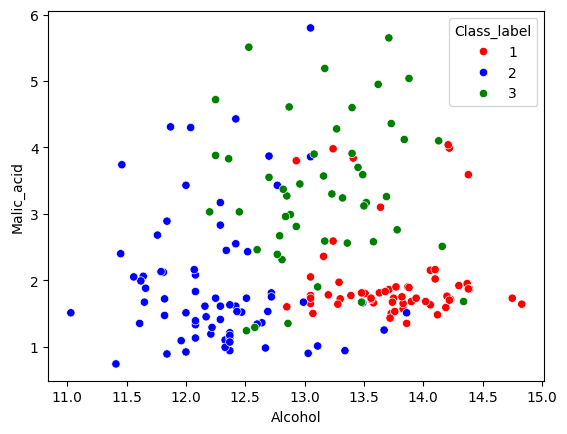

In [15]:
color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(x= df['Alcohol'], y=df['Malic_acid'], hue=df['Class_label'], palette = color_dict)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class_label', axis=1), df['Class_label'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#fit the scaler to train set, it will learn the parameter
scaler.fit(X_train)

#Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [23]:
np.round(X_train.describe(), 1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [24]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


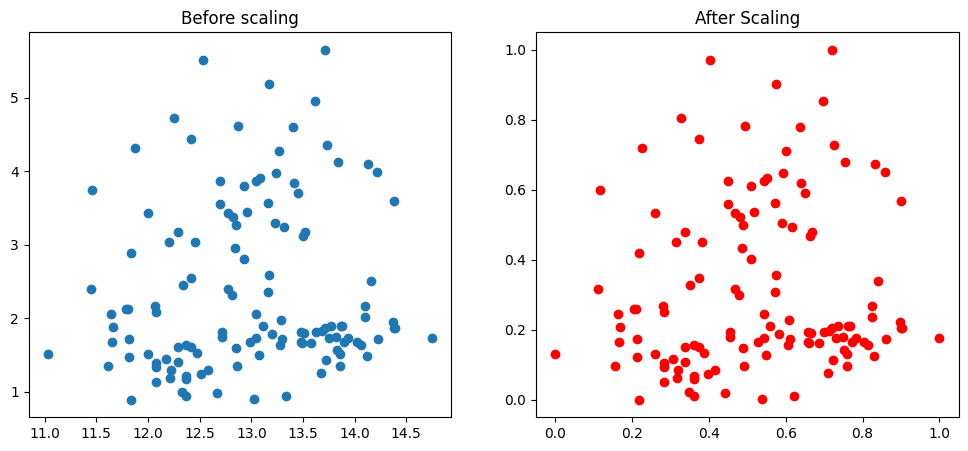

In [27]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic_acid'] )
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic_acid'], c='red')
ax2.set_title('After Scaling')
plt.show()

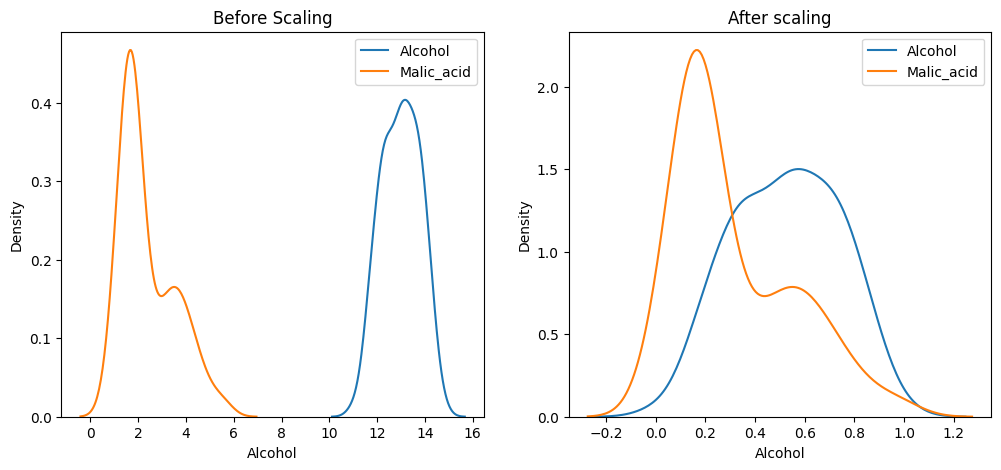

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
#Before scaling
sns.kdeplot(X_train['Alcohol'], ax=ax1, label='Alcohol')
sns.kdeplot(X_train['Malic_acid'], ax=ax1, label = 'Malic_acid')
ax1.set_title('Before Scaling')
ax1.legend()

#After scaling
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, label ='Alcohol')
sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2, label ='Malic_acid')
ax2.set_title('After scaling')
ax2.legend()

plt.show()

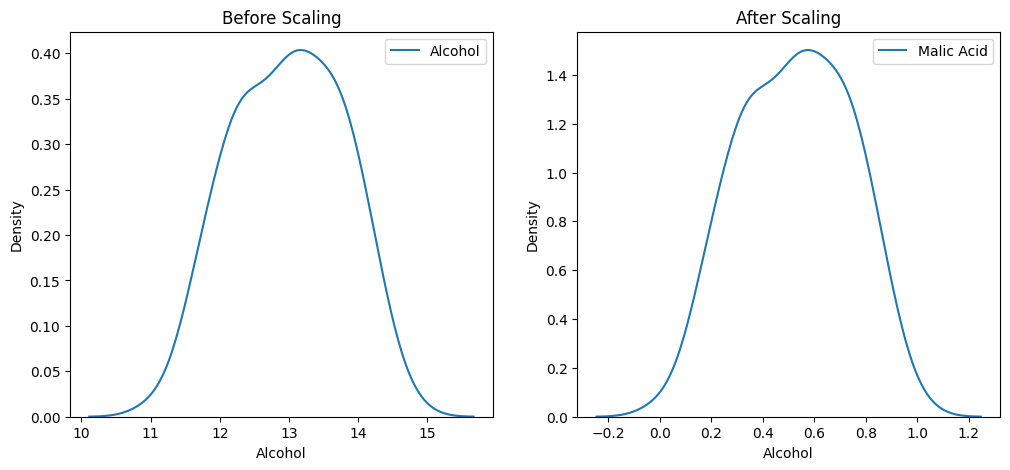

In [33]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
#Before scaling
sns.kdeplot(X_train['Alcohol'], ax=ax1, label='Alcohol')
ax1.set_title('Before Scaling')
ax1.legend()

sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2, label='Malic Acid')
ax2.set_title('After Scaling')
ax2.legend()

plt.show()

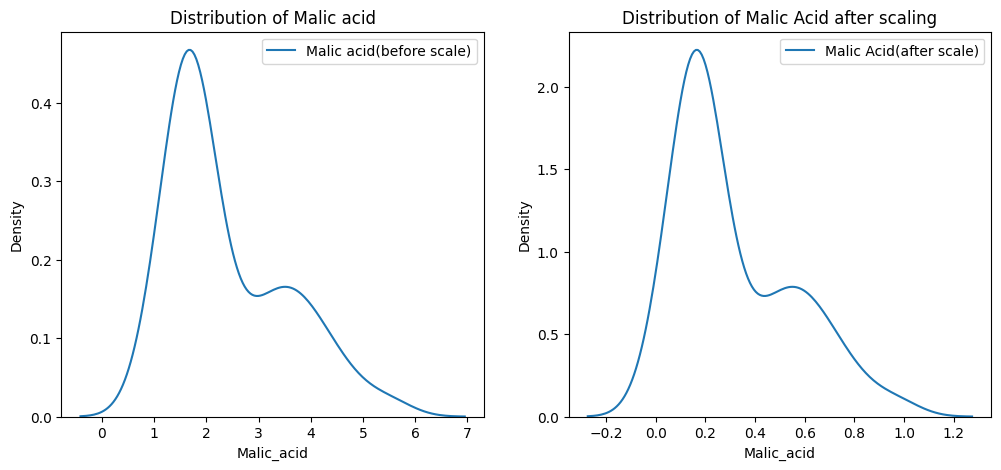

In [35]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
#Before Scaling
sns.kdeplot(X_train['Malic_acid'], ax=ax1, label='Malic acid(before scale)')
ax1.set_title('Distribution of Malic acid')
ax1.legend()

sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2, label = 'Malic Acid(after scale)')
ax2.set_title('Distribution of Malic Acid after scaling')
ax2.legend()

plt.show()